# Crime Data

# Hierarchical Clustering

In [5]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [6]:
data=pd.read_csv("crime_data.csv")
df=pd.DataFrame(data)
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
array=df.values

## Normalizing data

In [11]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
df_norm=norm_func(df.iloc[:,1:]) 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [13]:
df_norm.describe() #checking for min=0 and max=1

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


## Creating Dendrogram

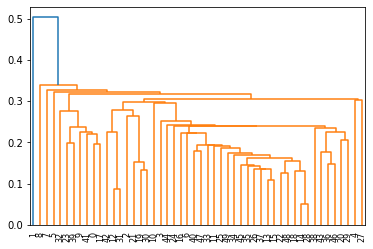

In [14]:
crime_deng=sch.dendrogram(sch.linkage(df_norm,method='single'))

## Creating Clusters

In [15]:
cc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage='single')
y_cc = cc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_cc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,3
2,0
3,0
4,0


In [16]:
df_norm['h_clusterid']=Clusters

In [17]:
hc=df_norm.sort_values("h_clusterid") #sorting values into clusters
hc

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
27,0.686747,0.708904,0.830508,1.000000,0
28,0.078313,0.041096,0.406780,0.056848,0
29,0.397590,0.390411,0.966102,0.297158,0
30,0.638554,0.821918,0.644068,0.640827,0
31,0.620482,0.715753,0.915254,0.485788,0
32,0.734940,1.000000,0.220339,0.227390,0
33,0.000000,0.000000,0.203390,0.000000,0
34,0.391566,0.256849,0.728814,0.364341,0
35,0.349398,0.363014,0.610169,0.328165,0


# K Means

In [18]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

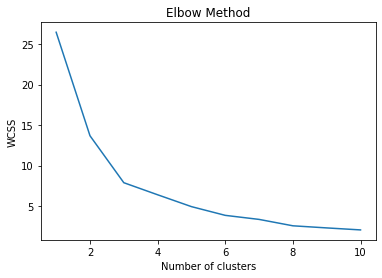

In [19]:
wcss = []
for i in range(1, 11): #1 to 10
    kmeans = KMeans(n_clusters=i,random_state=0) 
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)# inertia=twss
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
wcss

[26.46412255025644,
 13.677131512713244,
 7.877885564225406,
 6.386730880764109,
 4.9224710248264545,
 3.8444328382466026,
 3.3439455038995978,
 2.5541220767843043,
 2.2933612880021563,
 2.0455507302453584]

### from the 4th cluster i.e., 6.39 the drop is way more constant , so 4 could be better one

## Build Cluster algorithm

In [21]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=98)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=98)

In [22]:
clusters_new.labels_

array([0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 3, 0, 1, 3, 1, 1, 0, 3, 0, 1, 0,
       3, 0, 0, 3, 1, 0, 3, 1, 0, 0, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 0, 1,
       3, 1, 1, 3, 3, 1])

### Assigning clusters to the data set

In [23]:
df['clusterid_new'] = clusters_new.labels_

In [24]:
df

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


### Standardized values

In [25]:
clusters_new.cluster_centers_

array([[ 6.81057564e-01,  7.03386606e-01,  6.25235405e-01,
         5.39046799e-01, -5.55111512e-17],
       [ 3.11033608e-01,  3.18673396e-01,  6.58340767e-01,
         2.91173671e-01,  5.26315789e-02],
       [ 7.16867470e-01,  8.69863014e-01,  5.42372881e-01,
         7.98449612e-01,  2.50000000e+00],
       [ 1.31434830e-01,  9.80697385e-02,  3.25115562e-01,
         1.06178060e-01, -2.77555756e-17]])

### Mean of clusters

In [26]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.105556,250.388889,68.888889,28.161111
1,1,5.963158,138.052632,70.842105,18.568421
2,2,12.700000,299.000000,64.000000,38.200000
3,3,2.981818,73.636364,51.181818,11.409091


In [27]:
df

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0
